# Tarea semanal 6
## Martín Deleón

### Consignas:
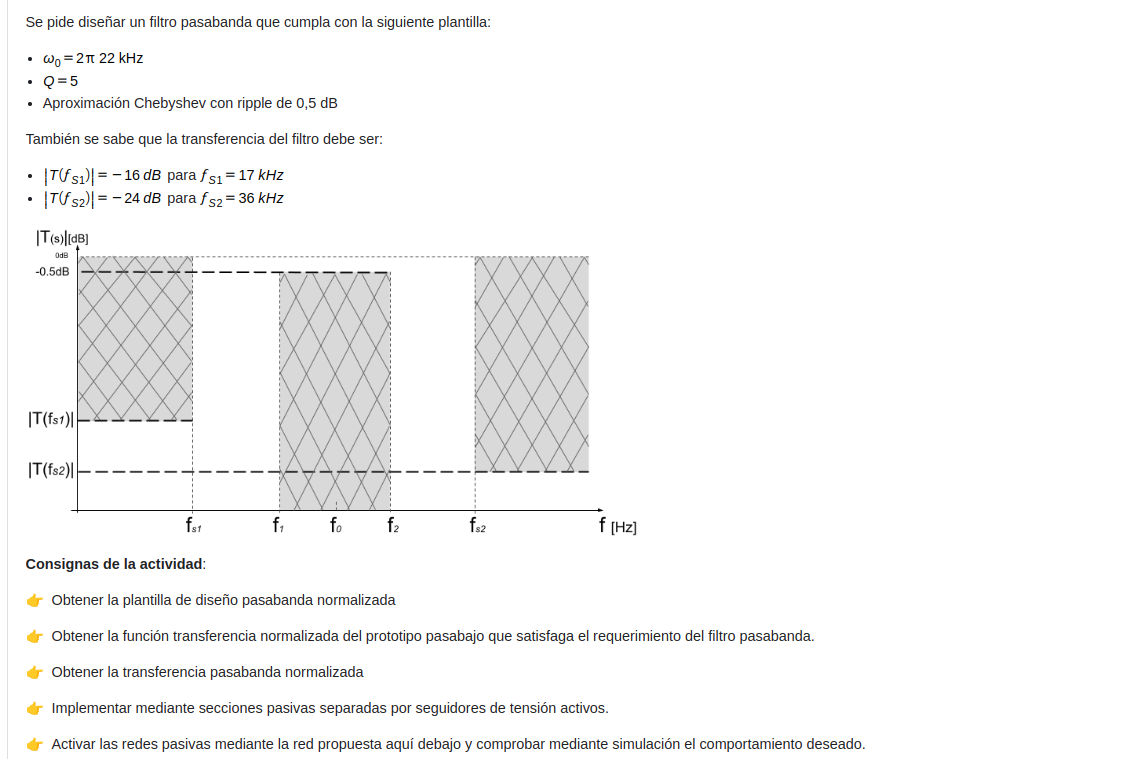
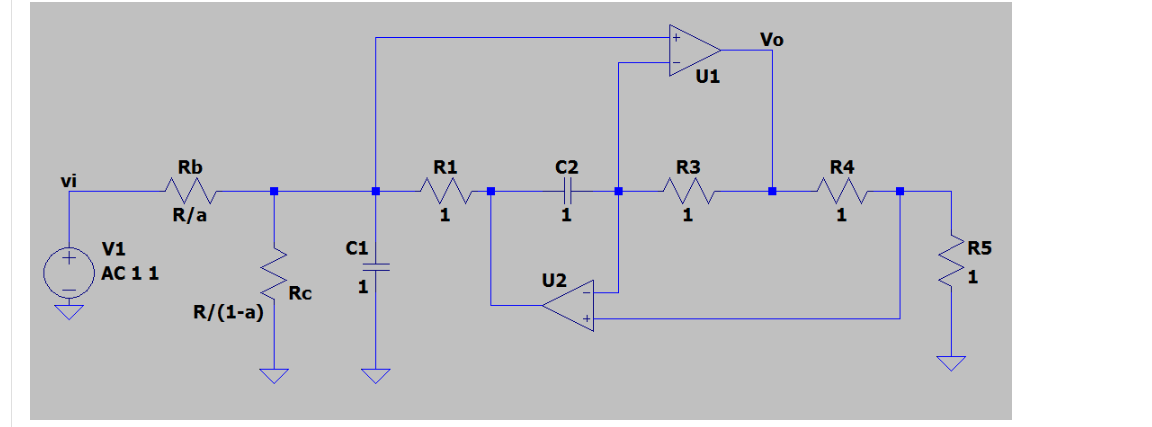



En este caso para esta tarea semanal decidi no adjuntar fotos de la resolución dado que es mas larga que las demas, pero si dejo el [link](https://drive.google.com/file/d/1wjJ78whD-Vwt1EdrysaAWTe3s08AIzLN/view?usp=drivesdk) para que puedan visualizarlo y acompañar los calculos o valores de componentes que fui poniendo en spice.

## Simulaciones númericas
En esta seccion realizaremos las simulaciones en python, primero cargaremos los requerimientos dados del filtro, luego calcularemos los parámetros faltantes y simularemos de manera simbolica.

In [2]:
#Importamos las librerias necesarias
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from pytc2.sistemas_lineales import analyze_sys, pretty_print_lti, tf2sos_analog, pretty_print_SOS

from pytc2.general import Chebyshev_polynomials, s, w, print_subtitle
import sympy as sp
from IPython.display import display

/home/martin/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
#Trabajamos de manera simbólica
alfa_max = 0.5
alfa_min0 = 16
alfa_min1 = 24

fo = 22000
fsi = 17000
fss = 36000
Q = 5

#Calculamos el ancho de banda
BW = fo/Q

f1 ,f2 = np.roots([1, -BW, -fo**2])

fps = f1
if (fps < 0):
    fps = f2 #Me quedo con el resultado positivo de las raíces

fpi = fps - BW


print("fpi =", fpi)
print("fps =", fps)



fpi = 19909.72636646596
fps = 24309.72636646596


### Normalizamos frecuencias
En este punto tomaremos una norma de frecuencia la cual sera 2.pi.frecuencia central, de esta forma la w0 nos quedara unitaria.

In [4]:
norma_w = 2*np.pi*fo

w0 = 2*np.pi*fo/norma_w

wpi = 2*np.pi*fpi/norma_w
wsi = 2*np.pi*fsi/norma_w
wps = 2*np.pi*fps/norma_w
wss = 2*np.pi*fss/norma_w

# Ahora podemos transformal el filtro a un prototipo pasabajos
Wpi = Q*(w0**2-wpi**2)/wpi/w0
Wsi = Q*(w0**2-wsi**2)/wsi/w0

Wps = -Q*(w0**2-wps**2)/wps/w0
Wss = -Q*(w0**2-wss**2)/wss/w0

print("Wpi =", Wpi, "Wsi =", Wsi)
print("Wps =", Wps, "Wss =", Wss,"\n")

ee = 10**(alfa_max/10)-1

print("epsilon^2 =", ee,"\n")

Wpi = 0.9999999999999992 Wsi = 2.6069518716577527
Wps = 1.0000000000000024 Wss = 5.126262626262628 

epsilon^2 = 0.12201845430196334 



Podemos ver que al aplicar el kernel de transformación Wpi y Wps tienden a 1, esto nos dice que vamos en buen camino. Dado que efectivamente estas frecuencias deberían dar exactamente 1. En caso de que obtengamos valores lejanos a 1, debemos detenernos y revisar todos los calculos ya que en ese caso no estariamos encaminados.

### Calculamos el orden del filtro

Este paso hay que realizarlo dos veces dado que la plantilla es asimétrica. Por lo tanto se realizara el procedimiento para las frecuencias inferiores y luego para frecuencias superiores para encontrar el mayor orden necesario para cumplir. Una vez encontrado este valor, debería satisfacer ambos requerimientos de plantilla dado que es el más exigente.

In [5]:
print("Ahora se calculará el orden del filtro necesario para satisfacer las restricciones por ambos lados \n")
ni = 0
for i in  range (1, 5):
      at = 10*np.log10(1 + ee* np.cosh(i*np.arccosh(Wsi))**2)
      print("Si n =", i, "Atenuación en Wsi =", at)
      if (at > alfa_min0 and ni == 0):
          ni = i
print ("El orden del filtro elegido para cumplir con la restricción inferior es n =", ni,"\n")


ns = 0
for i in  range (1, 5):
      at = 10*np.log10(1 + ee* np.cosh(i*np.arccosh(Wss))**2)
      print("Si n =", i, "Atenuación en Wsi =", at)
      if (at > alfa_min0 and ns == 0):
          ns = i
print ("El orden del filtro elegido para cumplir con la restricción superior es n =", ns,"\n")

if (ni > ns):
    n = ni
else:
    n = ns
print ("Se trabajará con un filtro de orden n=",n,"\n" )

Ahora se calculará el orden del filtro necesario para satisfacer las restricciones por ambos lados 

Si n = 1 Atenuación en Wsi = 2.6227581358748617
Si n = 2 Atenuación en Wsi = 13.085276188755433
Si n = 3 Atenuación en Wsi = 26.866707277839453
Si n = 4 Atenuación en Wsi = 40.862114569723246
El orden del filtro elegido para cumplir con la restricción inferior es n = 3 

Si n = 1 Atenuación en Wsi = 6.239178280680386
Si n = 2 Atenuación en Wsi = 25.123400470188976
Si n = 3 Atenuación en Wsi = 45.242131206488956
Si n = 4 Atenuación en Wsi = 65.37477409889212
El orden del filtro elegido para cumplir con la restricción superior es n = 2 

Se trabajará con un filtro de orden n= 3 



Como se menciono antes se elige el orden mayor dado que este cumple ambos requerimientos de la plantilla.
En este punto ya podemos realizar las simulaciones, simularemos el filtro pasabajos prototipo y el pasabanda.

Transferencia pasabajos


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Transferencia pasabanda


<IPython.core.display.Math object>

[[1,
  [<Axes: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
   <Axes: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>]],
 [2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>],
 [3, ()],
 [4,
  <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>]]

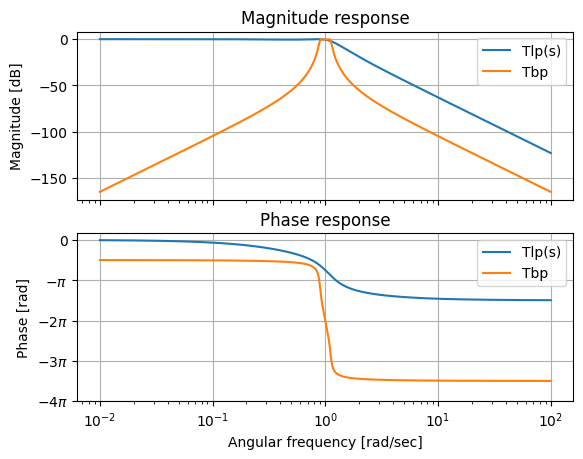

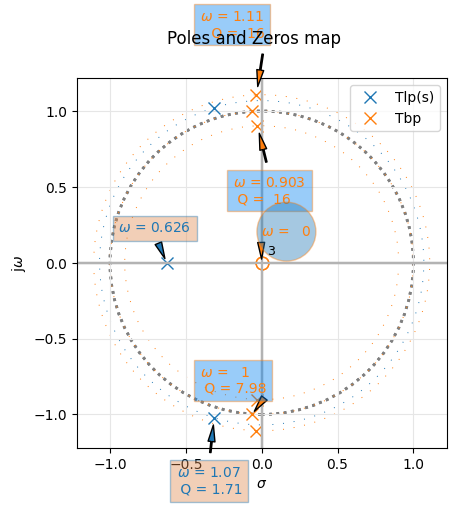

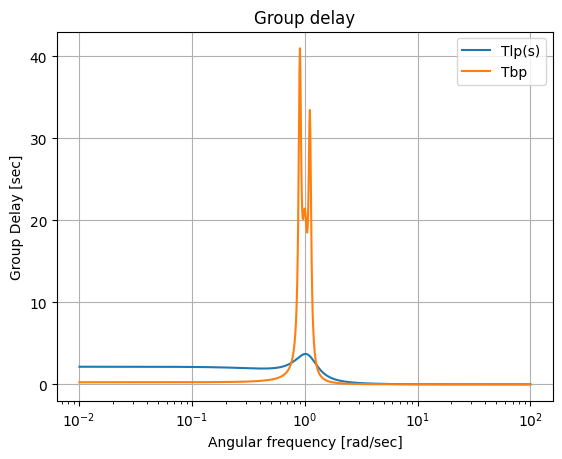

In [10]:
z, p, k = sig.cheb1ap(n, alfa_max)

Nlp, Dlp = sig.zpk2tf(z, p, k)
tflp = sig.TransferFunction ( Nlp, Dlp )
#SOSlp = sig.tf2sos(Nlp, Dlp)
SOSlp = tf2sos_analog(Nlp, Dlp)

print("Transferencia pasabajos")
pretty_print_lti(Nlp, Dlp)
pretty_print_SOS(SOSlp, mode ="omegayq")


analyze_sys(tflp, sys_name = "Tlp(s)")

Nbp, Dbp = sig.lp2bp(Nlp , Dlp, w0, BW/fo)

print("Transferencia pasabanda")
pretty_print_lti(Nbp, Dbp)

tfbp = sig.TransferFunction(Nbp, Dbp)
analyze_sys(tfbp, sys_name = "Tbp")

Lamentablemente el zoom que proporciona jupyter no nos ayuda a visualizar el filtro, pero al poner el mismo codigo en spyder podemos ver la siguiente imágen en donde queda más clara la respuesta de modulo del filtro diseñado:
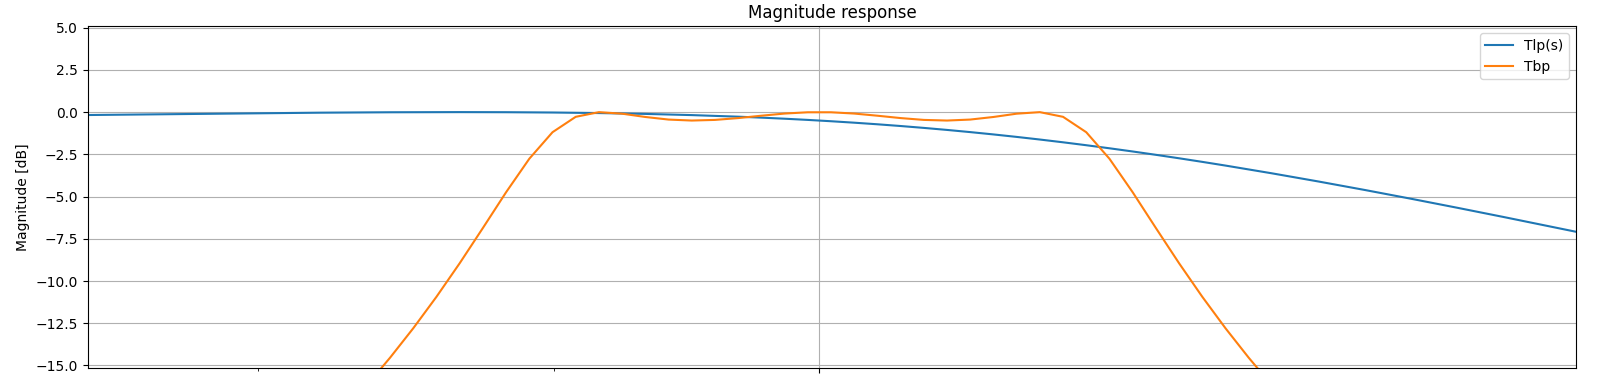

Tambien agrego la de polos y ceros dado que se veia algo obstruida por el titulo del gráfico
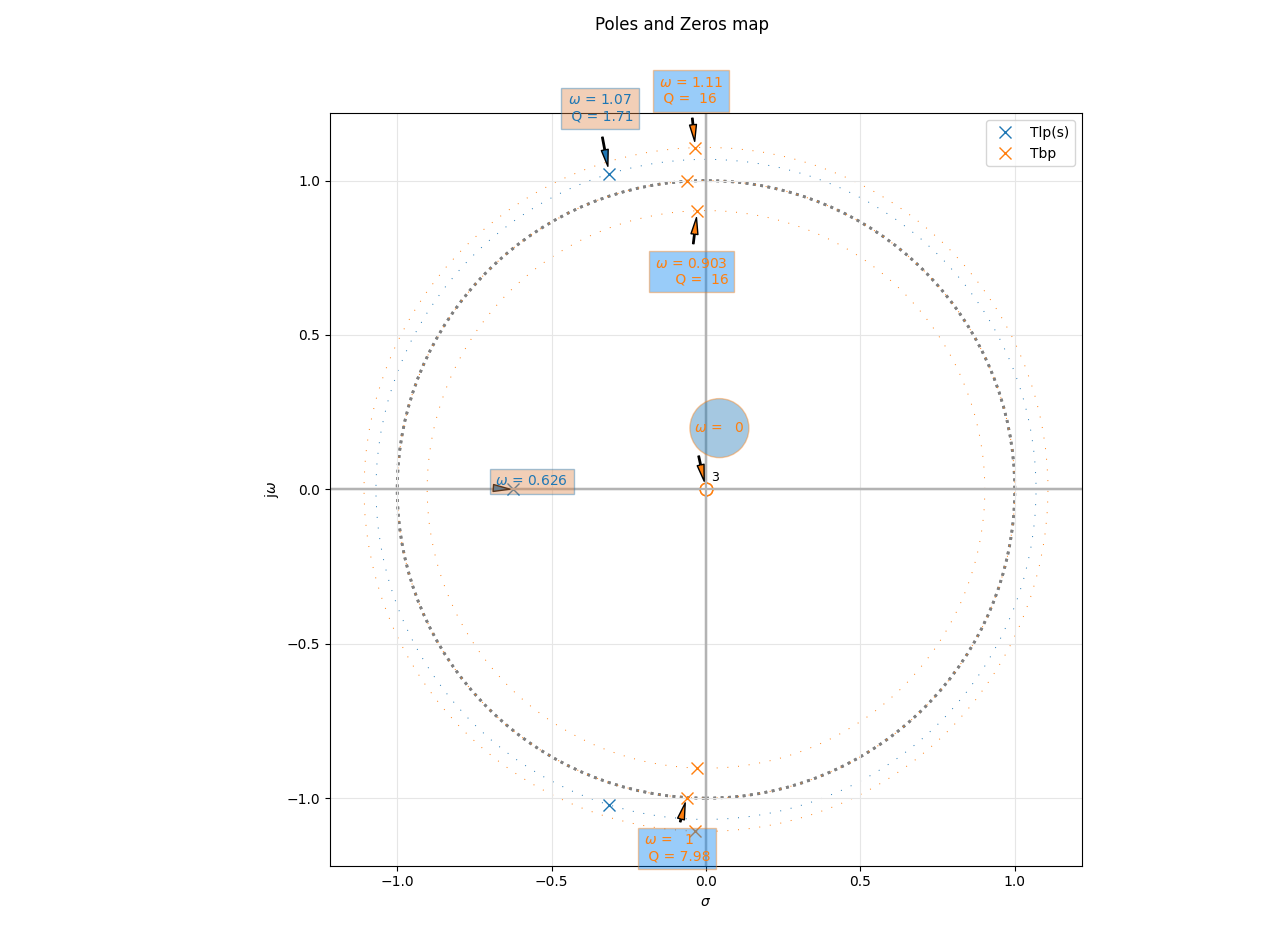

## Simulaciones en LTspice
En esta sección se encuentran todas las simulaciones circuitales que fui realizando.
Empezamos por simular el circuito normalizado con inductores discretos

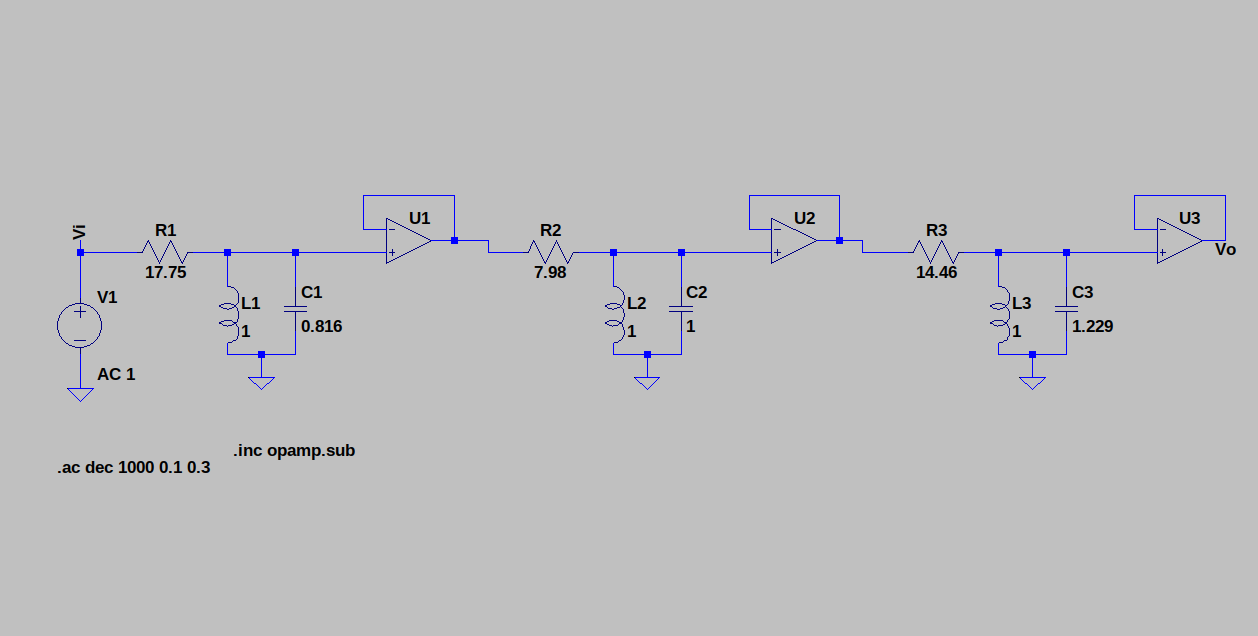

Al realizar este circuito queda a la vista la necesidad de utilizar los seguidores de tensión, dado que sin ellos los polos de los filtros no se mantienen invariantes, pero ademas estos nos tientan a agregar 2 resistores y poder obtener una ganancia con gran facilidad, sin embargo este paso lo dejaremos para más adelante cuando activemos el circuito con el gic, en el cual su salida es dos veces la tensión de entrada.

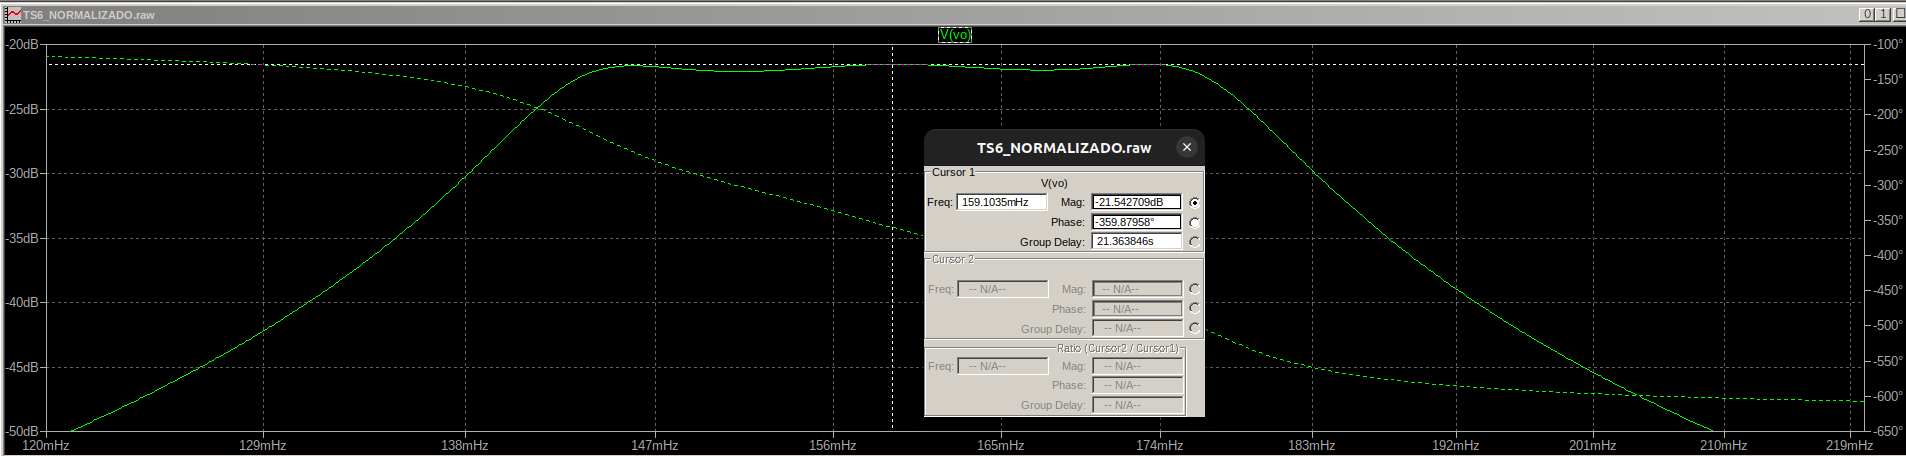

Podemos ver que la frecuencia central esta en 159mHz lo cual tiene sentido dado que este valor es 1/2pi

El siguiente paso es desnormalizar el filtro por lo que se simulara el mismo circuito pero aplicando la desnormalización

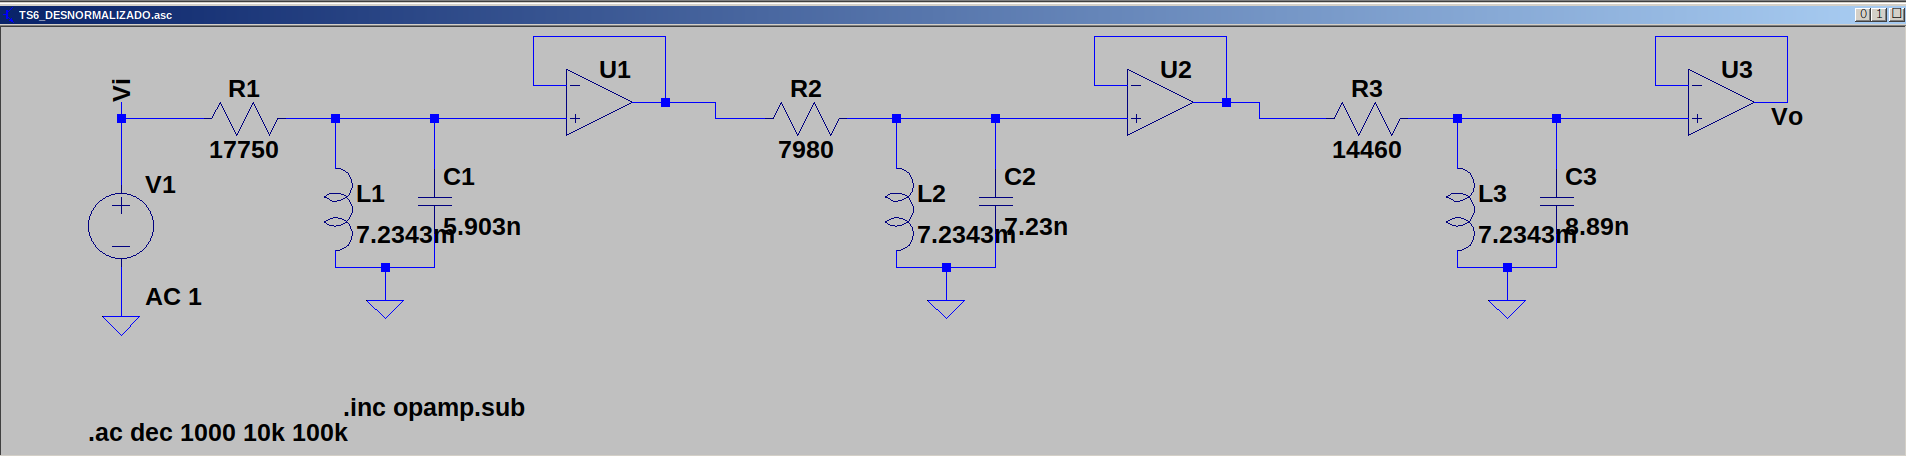
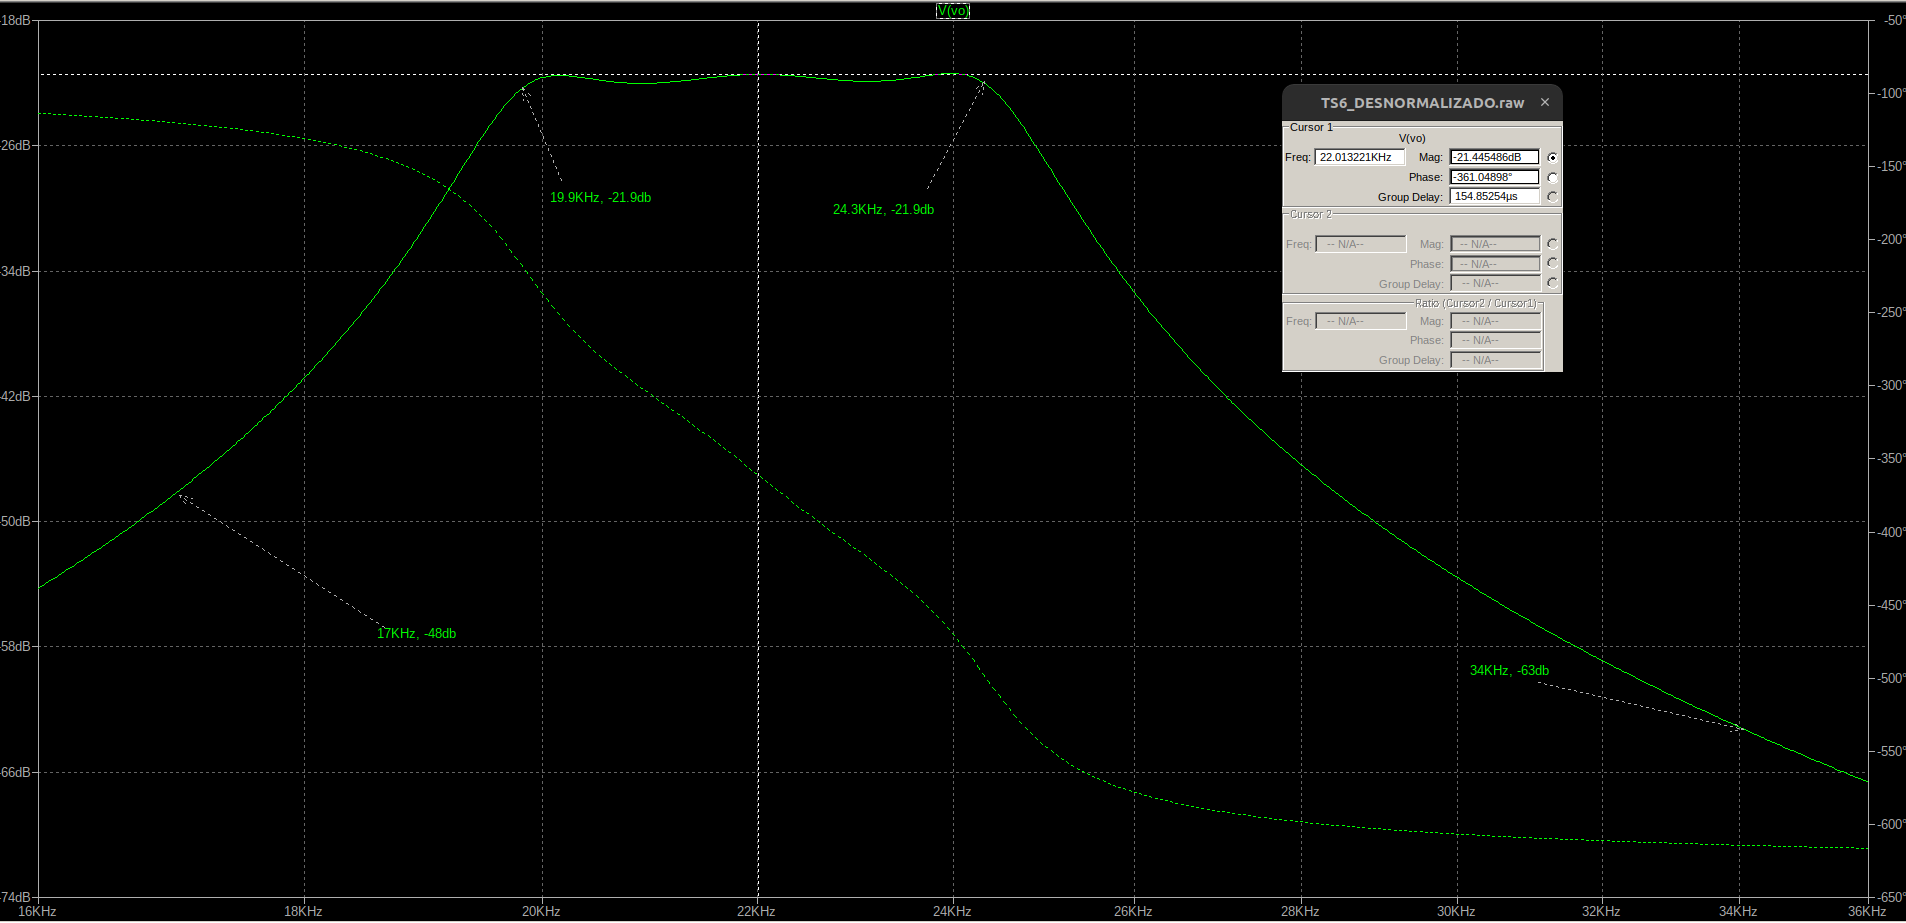

### Agrego ganancia

En este punto agregamos las resistencias previamente nombradas para obtener la ganancia requerida por plantilla
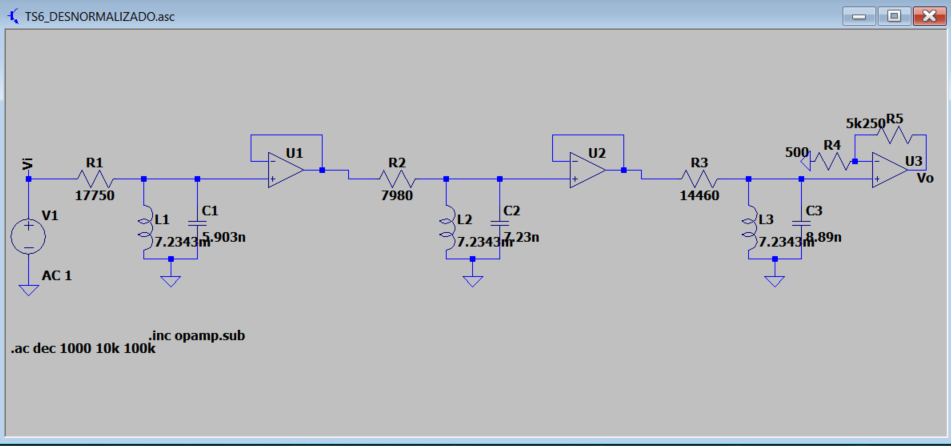

Dado que tenemos un operacional en la salida del filtro resulta facil obtener ganancia realizando el divisor resistivo que se encuentra en el circuito. De este se obtiene una ganancia de 10.5 veces aproximadamente.

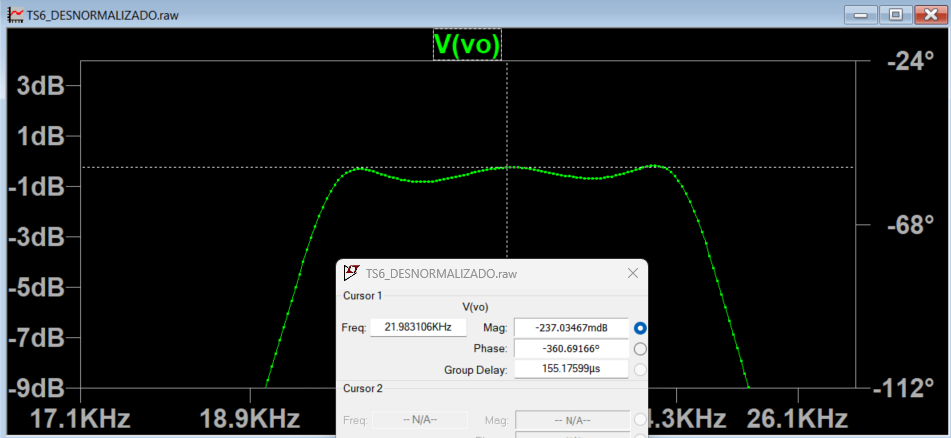

Ahora vemos que en la frecuencia central tenemos menos atenuación que la máxima requerida por plantilla


### Simualación con circuito activado
En este punto se remplazan los inductores por circuitos activos.

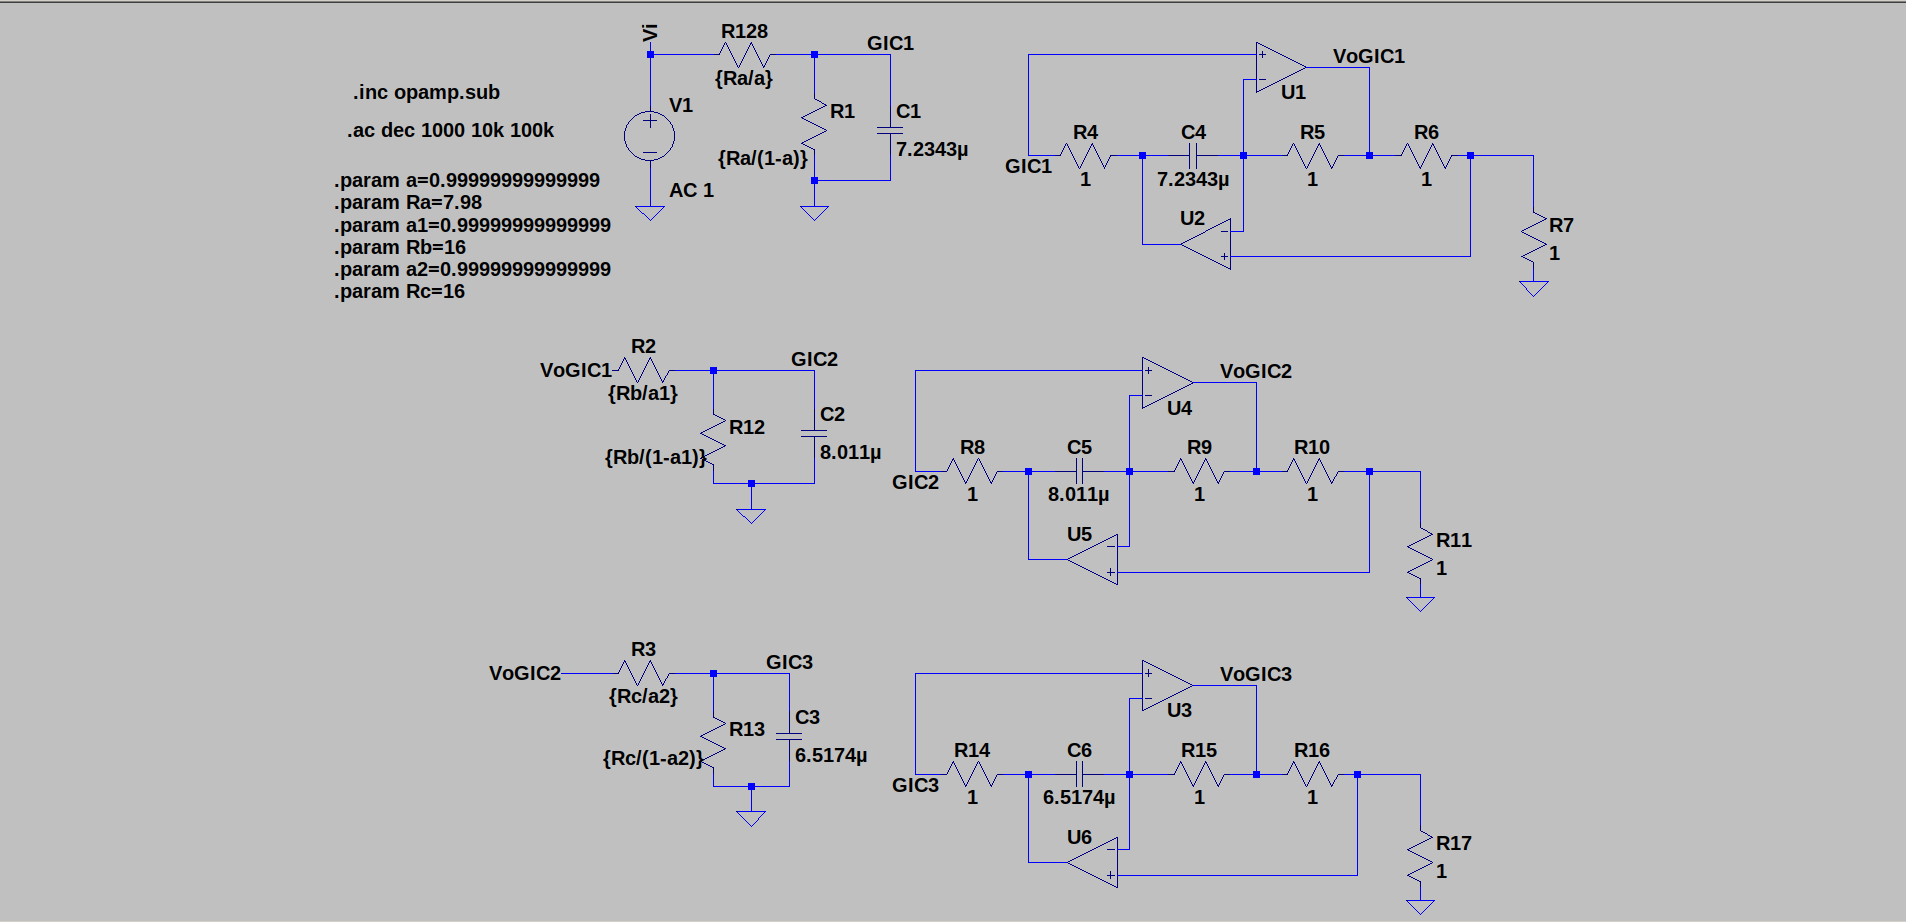
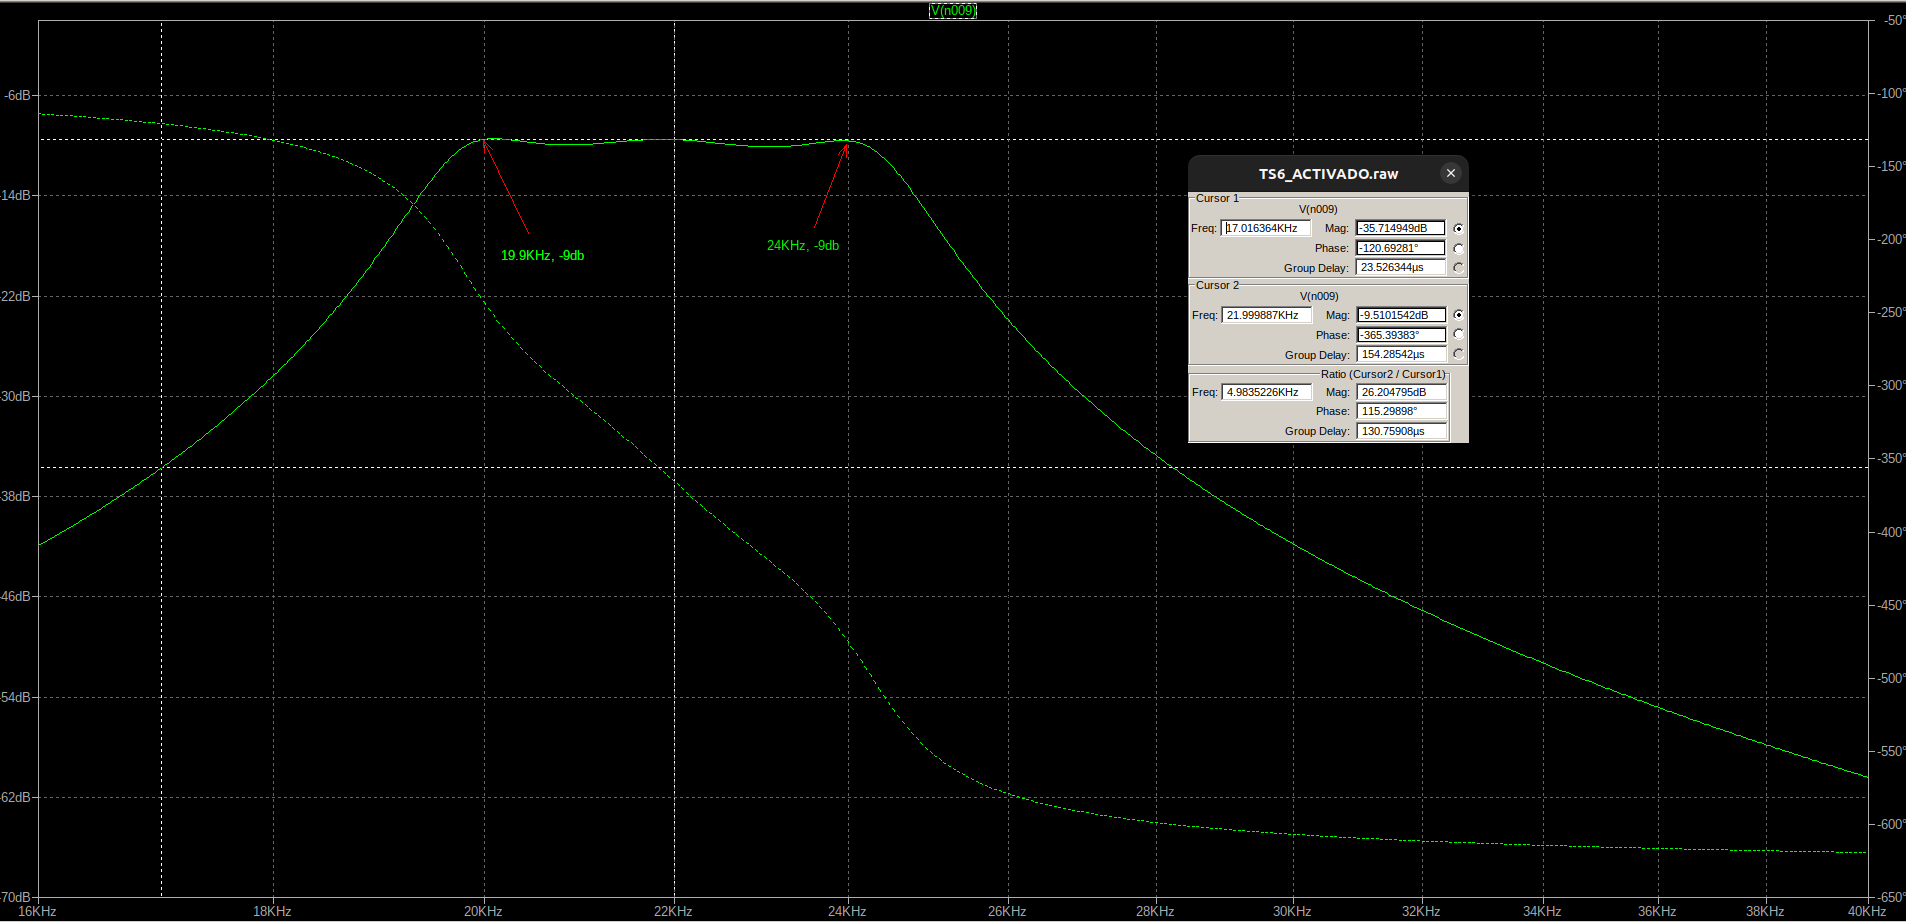

En este caso se simuló con los parametros de los elevadores de tension cercanos a 1 para no atenuar la señal de salida.

Como corrección de la entrega anterior, agrego ganancia a los circuitos activos. Concretamente esto se puede realizar modificando el valor de una única resistencia. Pero al hacer esto estamos modificando tambien el valor de impedancia de entrada que presenta el "GIC", por ende modificaremos dos resistencia de la siguiete manera.

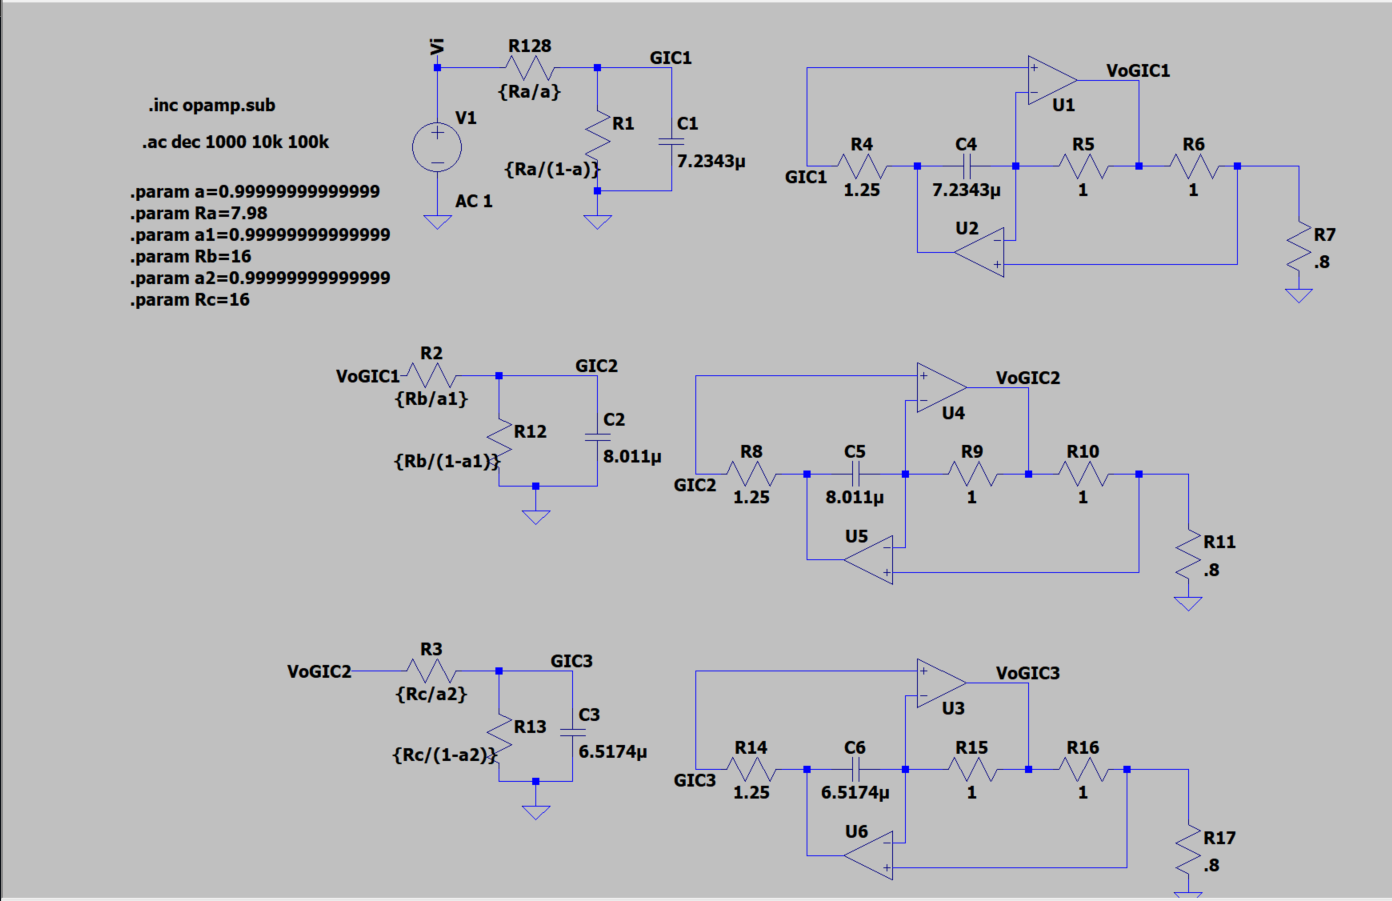

Se puede ver que la resistencia R4 y R7 fueron modificadas comparando con el circuito anterior. En todos los giradores se modificaron estas mismas resistencias.
Si analizamos la transferencia del girador, llegaremos a:

\begin {equation}
    K = (1 + \frac{G7}{G6})
\end {equation}

Por otro lado la impedancia de entrada del circuito esta dada por la siguiente ecuación:

\begin {equation}
    Zin = \frac{R4.R5.R7}{C2.R6}
\end {equation}

Por esta razón R4 = 1/R7. Mantenemos el valor de impedancia de entrada invariante.

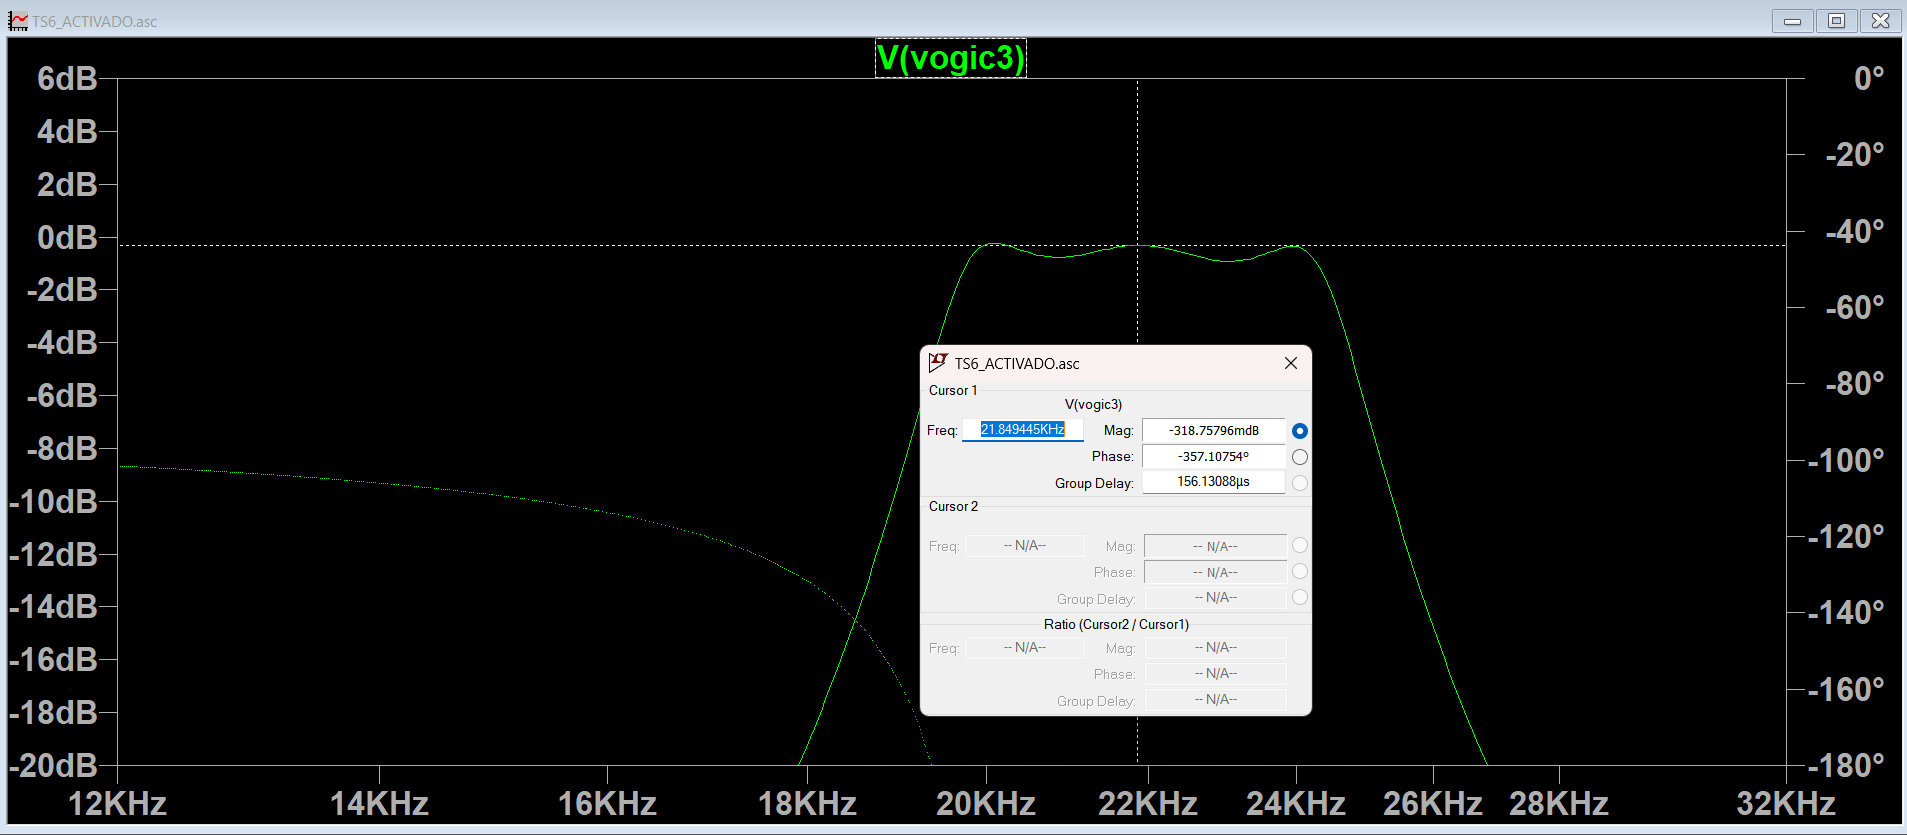

### Conclusiones

El circuito propuesto para activar inductores es de gran utilidad, ya que se aprovecha la salida del opamp para evitar el uso de un buffer, esta salida tiene un cierto nivel de amplificacion que hay que tener en cuenta, por ello se hace el levantamiento de R con atenuacion, aunque en este caso la simulación no responde a lo pensado en el papel.
Más alla de esta incongruencia cabe destacar que la transferencia sera igual en cuanto a polos y ceros, estos no se desplazan por realizar un levantamiento.